# Business Case

Bob has started his own **mobile** company and wants to compete with big brands like **Apple** and **Samsung**.  
He needs help estimating the **price range** of the mobiles his company creates. In today’s competitive market, assumptions won’t work, so he has collected **sales data** of mobile phones from various companies.

Bob wants to discover the relationship between **features** of a mobile phone (e.g., **RAM**, **Internal Memory**, etc.) and its **selling price**. Since he is not proficient in **Machine Learning**, he needs assistance.

**Goal:** You do **not** need to predict the exact price; instead, predict a **price range** indicating how high the price is.

**Inputs:** Mobile features (e.g., RAM, Internal Memory, …)  
**Output:** **Categorical price range** (e.g., low / medium / high / very high)

# Domain Analysis

1. **battery_power** – Total energy a battery can store in one time measured in mAh  
2. **blue** – Has bluetooth or not  
3. **clock_speed** – Speed at which microprocessor executes instructions  
4. **dual_sim** – Has dual sim support or not  
5. **fc** – Front Camera mega pixels  
6. **four_g** – Has 4G or not  
7. **int_memory** – Internal Memory in Gigabytes  
8. **m_dep** – Mobile Depth in cm  
9. **mobile_wt** – Weight of mobile phone  
10. **n_cores** – Number of cores of processor  
11. **pc** – Primary Camera mega pixels  
12. **px_height** – Pixel Resolution Height  
13. **px_width** – Pixel Resolution Width  
14. **ram** – Random Access Memory in Megabytes  
15. **sc_h** – Screen Height of mobile in cm  
16. **sc_w** – Screen Width of mobile in cm  
17. **talk_time** – Longest time that a single battery charge will last when you are  
18. **three_g** – Has 3G or not  
19. **touch_screen** – Has touch screen or not  
20. **wifi** – Has wifi or not  
21. **price_range** – This is the target variable with values:  
    - 0 = low cost  
    - 1 = medium cost  
    - 2 = high cost  
    - 3 = very high cost  


## Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
wn.filterwarnings("ignore") 
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
import pickle

## Importing Data 

In [17]:
df=pd.read_csv("datasets_11167_15520_train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Basic Checks

In [19]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [20]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [22]:
df.shape

(2000, 21)

In [23]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [24]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [25]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Basic checks insights

## Exploratory Data Analysis

### Univariate Analysis

<Axes: xlabel='price_range', ylabel='Density'>

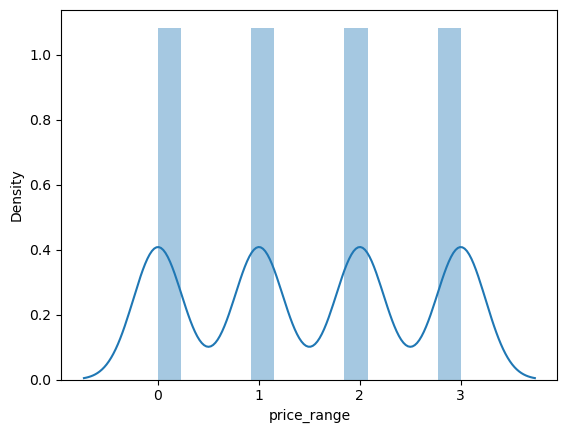

In [29]:
sns.distplot(df["price_range"],kde=True)

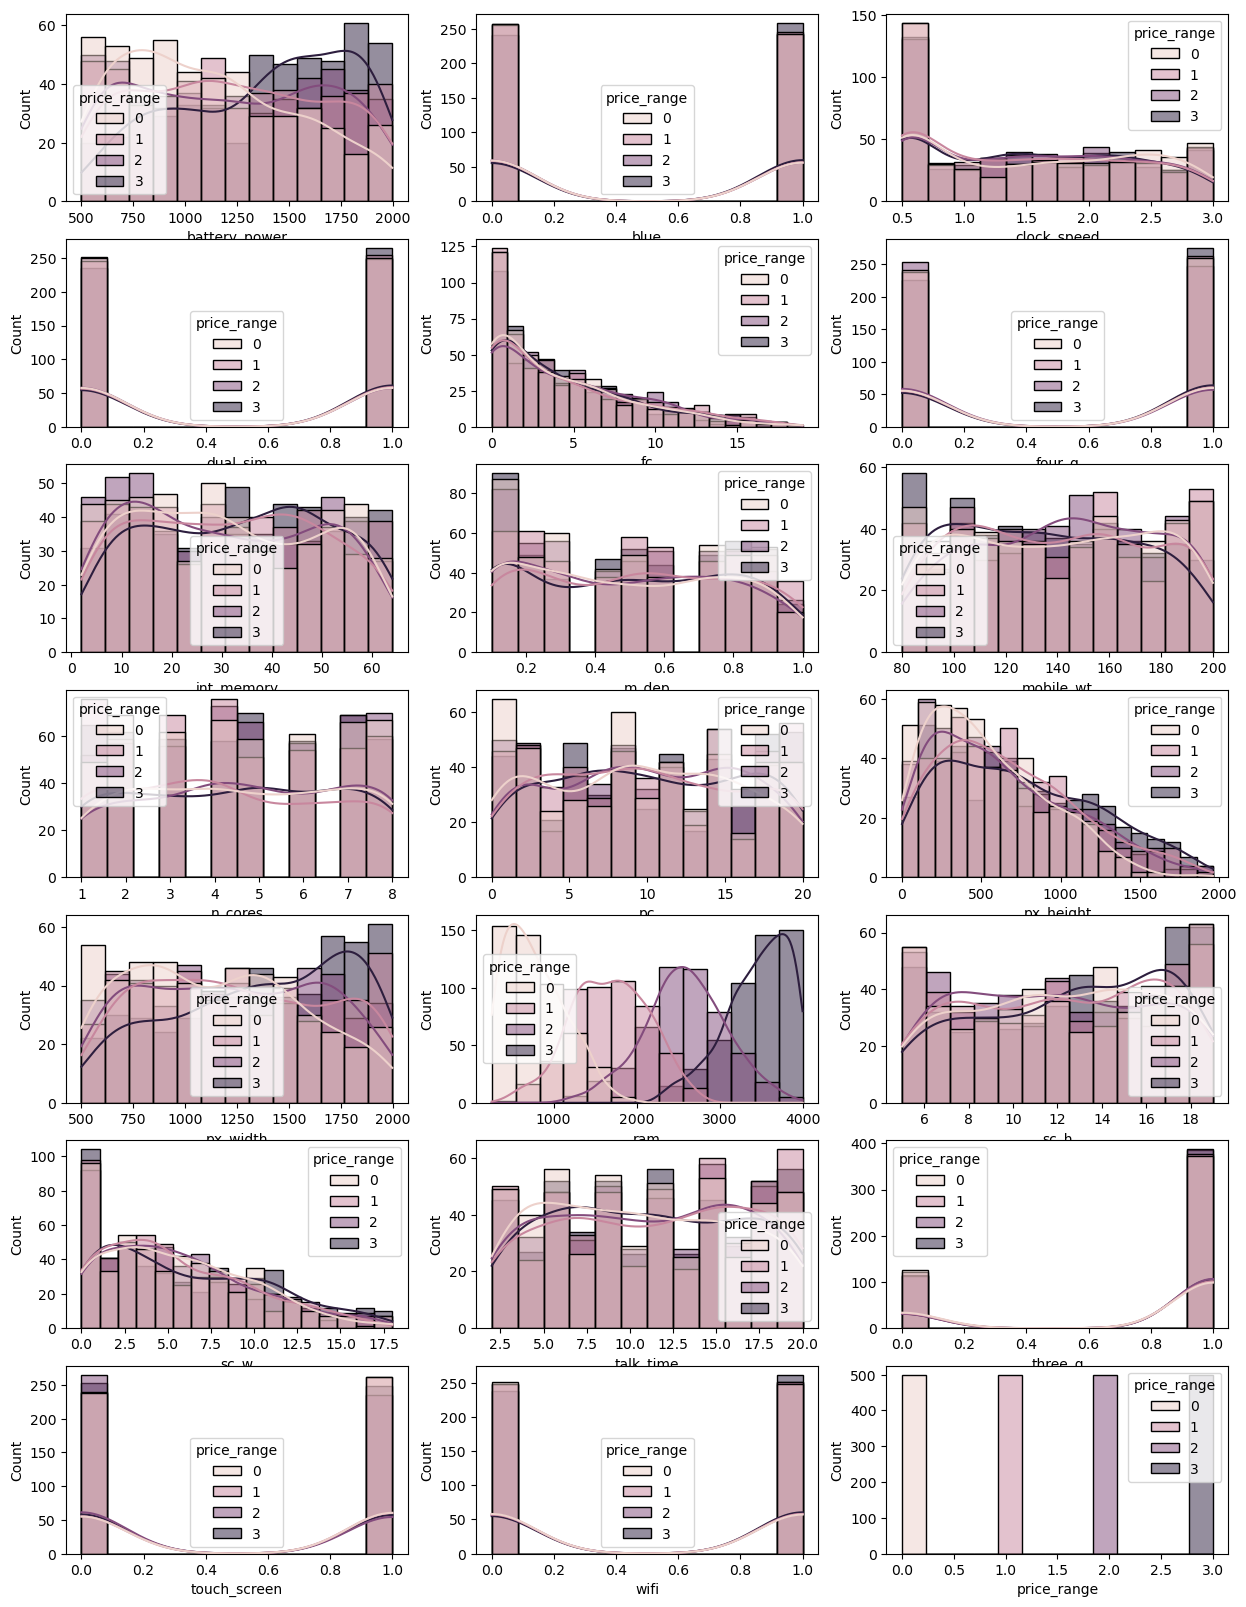

In [30]:
plt.figure(figsize=(15,20)) #width and height
plotnumber=1

for i in df:
    plt.subplot(7,3,plotnumber)
    sns.histplot(x=i, data=df, kde=True,hue="price_range")
    plotnumber+=1 
    

### insights:
* **Battery Power**: Higher battery power is associated with higher price ranges.
* **Blue (Bluetooth Feature)**: The presence of Bluetooth does not significantly impact price range distribution.
* **Clock Speed**: No clear trend between clock speed and price range, indicating minimal influence.
* **Dual SIM**: Dual SIM feature is distributed similarly across all price ranges.
* **Front Camera (fc)**: Higher front camera megapixels are associated with higher price ranges.
* **Four G (4G Support)**: Presence of 4G is evenly distributed across price ranges, suggesting weak influence.
* **Internal Memory**: Higher internal memory is correlated with higher price ranges.
* **Mobile Depth (m_dep)**: No clear relationship between mobile depth and price range.
* **Number of Cores (n_cores)**: Higher core counts tend to be associated with higher price ranges.
* **Primary Camera (pc)**: Higher primary camera megapixels tend to be in higher price ranges.
* **Mobile Weight (mobile_wt)**: Weight distribution is spread across price ranges, showing weak correlation.
* **Pixel Height (px_height)**: Higher pixel height (better resolution) is strongly associated with higher price ranges.
* **RAM**: Higher RAM values are strongly associated with higher price ranges.
* **Screen Height (sc_h)**: Screen height distribution is relatively uniform across price ranges, with a slight increase in higher price ranges.
* **Pixel Width (px_width)**: Higher pixel width is more frequent in higher price ranges.
* **Screen Width (sc_w)**: Screen width distribution is fairly uniform across price ranges.
* **Talk Time**: Talk time does not show a strong correlation with price range.
* **Three G (three_g)**: Most phones support 3G, with a slight increase in higher price ranges.
* **Touch Screen**: Touch screen presence is uniformly distributed across price ranges.
* **WiFi**: WiFi presence is uniformly distributed across price ranges.
* **Price Range**: The distribution of phones across the four price ranges is relatively even.
* By comparing with other price cost type 3(very high cost) is most higher

## Bivariate Analysis

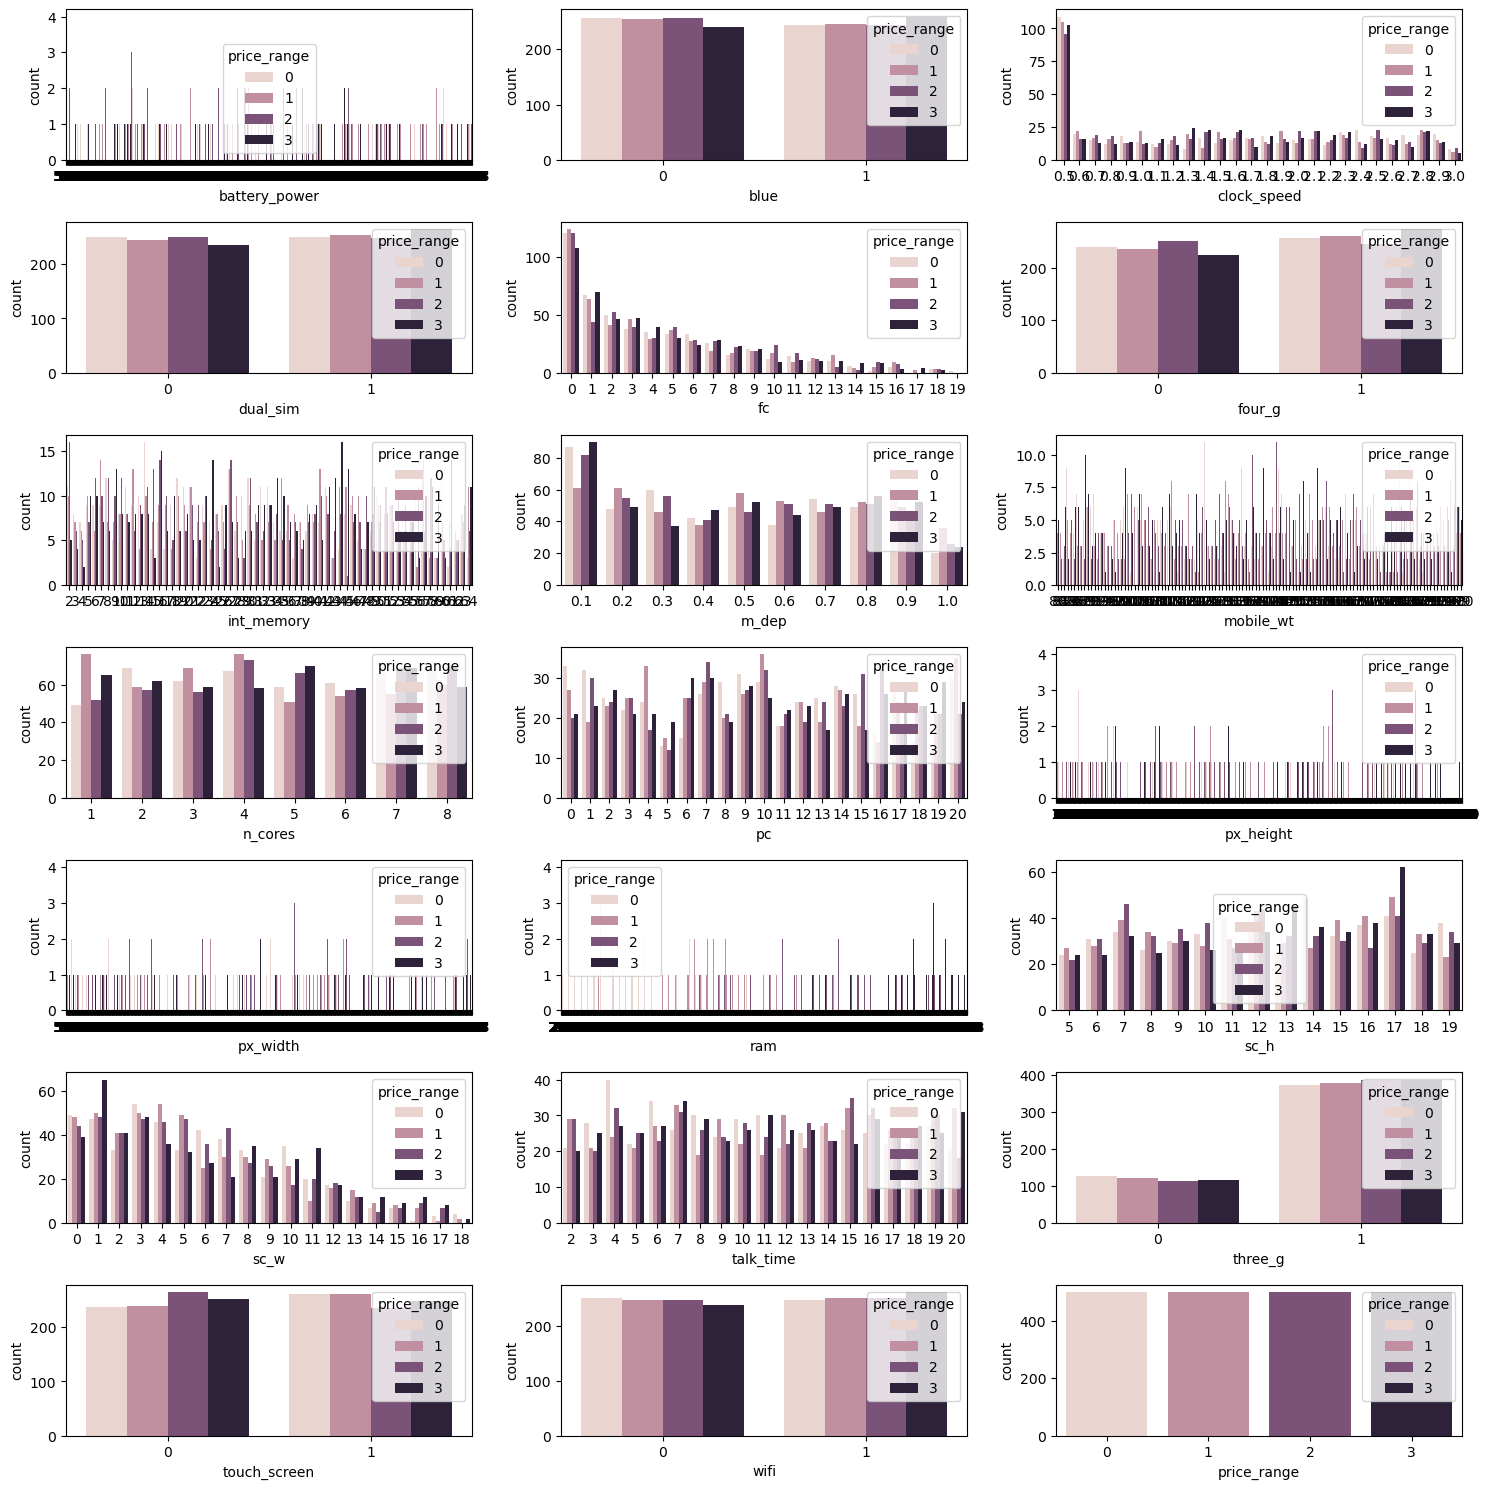

In [33]:
plt.figure(figsize=(15, 15))
pltno = 1

for i in df.columns:
    plt.subplot(7, 3, pltno)
    sns.countplot(x=df[i], hue=df["price_range"])
    pltno += 1
plt.subplots_adjust(hspace=0.5)  
plt.tight_layout()
plt.show()

<Axes: xlabel='three_g', ylabel='ram'>

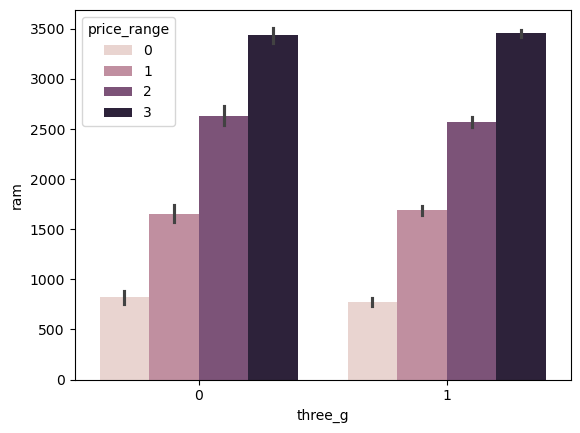

In [34]:
sns.barplot(x="three_g", y = "ram",data=df, hue="price_range")

Higher RAM is consistently associated with higher price ranges, regardless of the presence of 3G.

# Data preprocessing

### Handling With Null Values

In [38]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There is no null values in the cellphone dataset

In [40]:
df.duplicated().sum()

0

There is no duplicated values in the cellphone dataset

### Handling With Outlayers

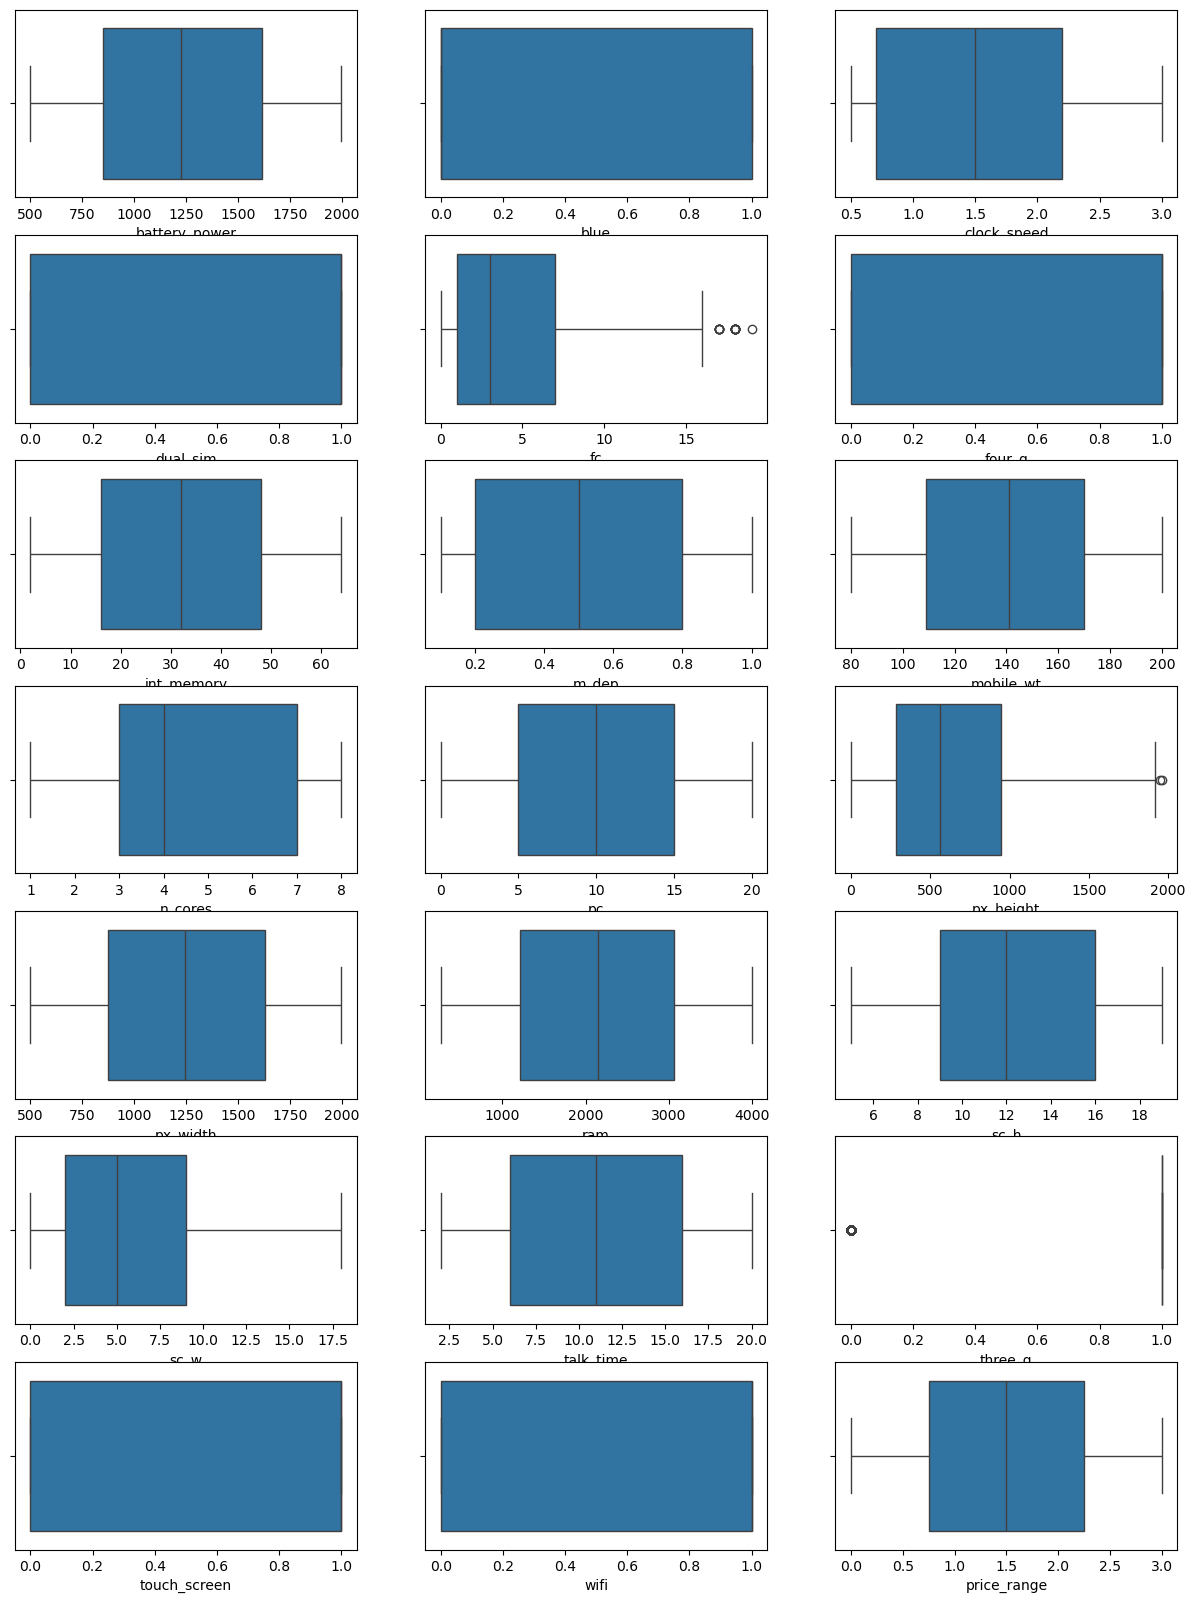

In [43]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df:
    plt.subplot(7,3,plotnumber)
    sns.boxplot(x=i,data=df)
    plotnumber+=1

In [44]:
q1=np.percentile(df.fc,25)
q3=np.percentile(df.fc,75)
IQR=q3-q1
upper=q3+(1.5*IQR)
lower=q1-(1.5*IQR)
print(lower,q1,IQR,q3,upper)
print(max(df.fc),min(df.fc))

-8.0 1.0 6.0 7.0 16.0
19 0


In [45]:
olst=["fc","px_height","three_g"] 
for a in olst:
    q1=np.percentile(df[a],25)
    q3=np.percentile(df[a],75)
    iqr=q3+(1.5*IQR)
    upper=q3+(1.5*IQR)
    median=np.median(df[a])
    print(a)
    print(lower,median,upper)
    print("Above:",df.loc[df[a]>upper].count()[0])
    print("Below:",df.loc[df[a]<lower].count()[0])
    if df.loc[df[a]>upper].count()[0]>0:
        df.loc[df[a]>upper,a]=median
    if df.loc[df[a]<lower].count()[0]>0:
        df.loc[df[a]<lower,a]=median
    

fc
-8.0 3.0 16.0
Above: 18
Below: 0
px_height
-8.0 564.0 956.25
Above: 484
Below: 0
three_g
-8.0 1.0 10.0
Above: 0
Below: 0


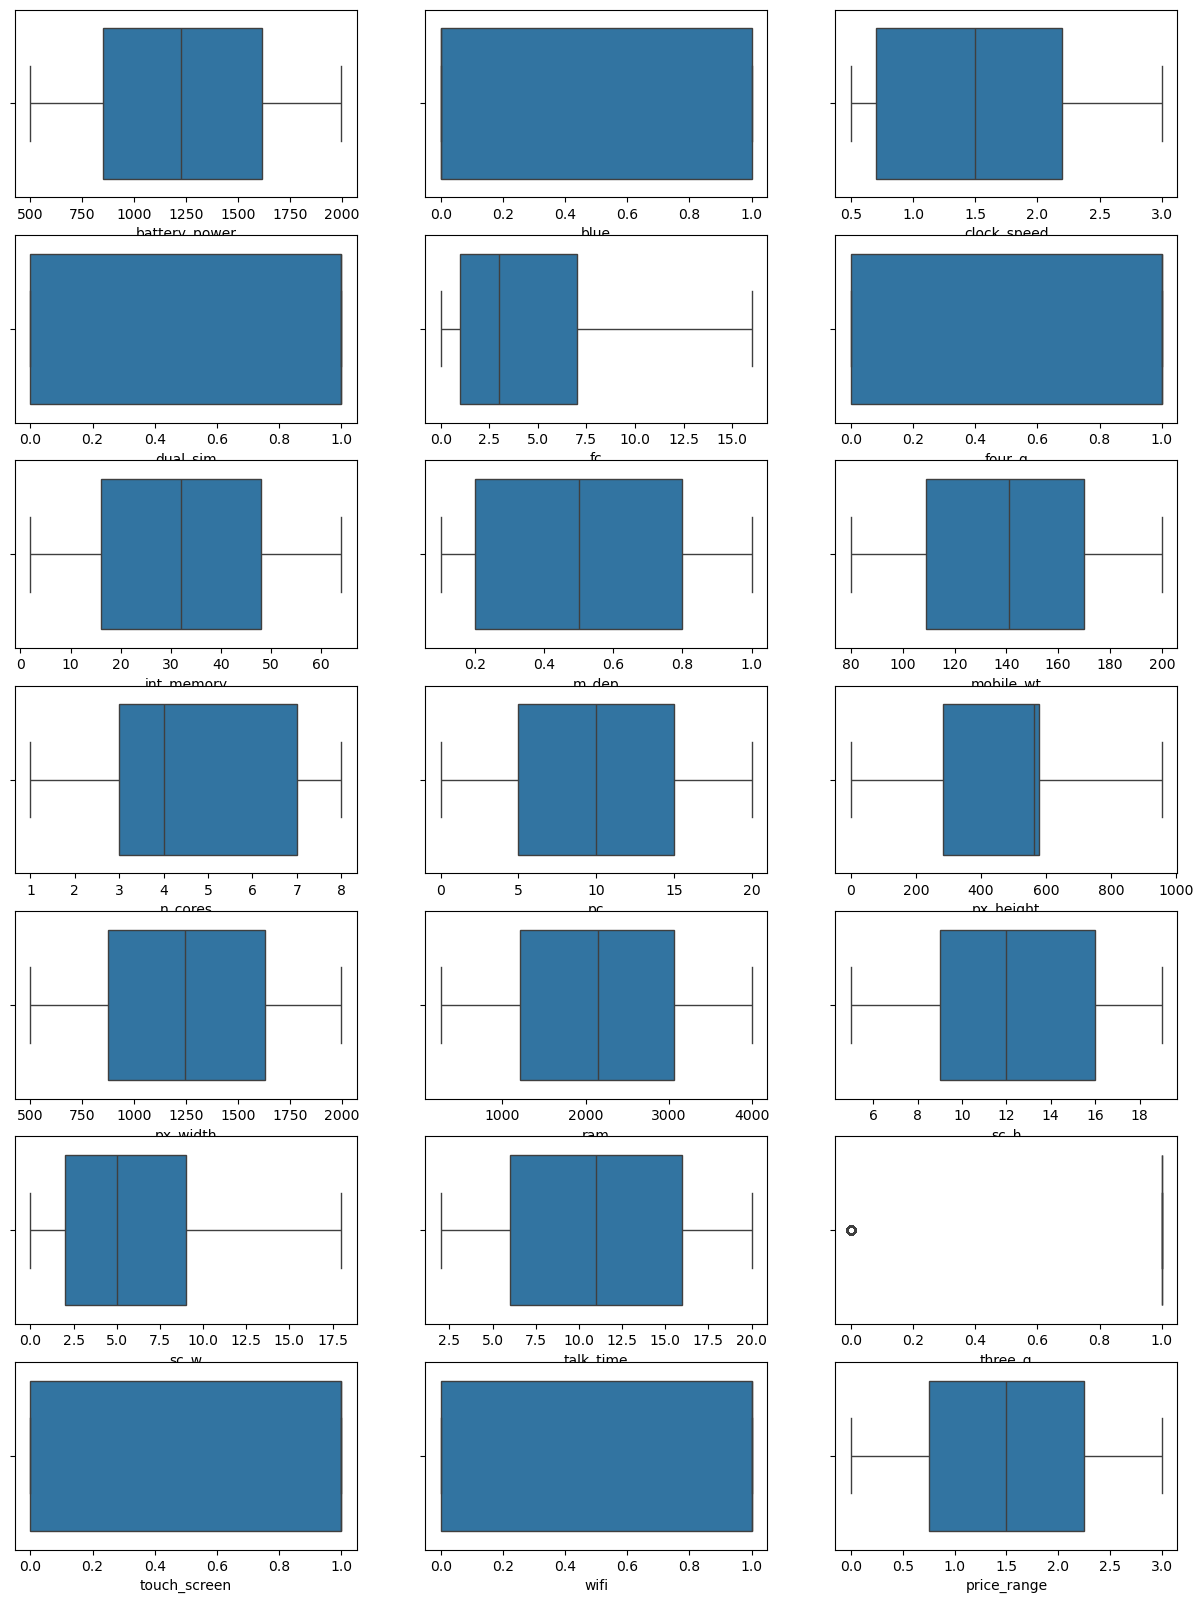

In [46]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df:
    plt.subplot(7,3,plotnumber)
    sns.boxplot(x=i,data=df)
    plotnumber+=1

## Feature Selection

In [48]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.018896,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.010553,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003560,0.013443,0.041177,0.004049,-0.008605,0.036161,...,0.013637,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.006880,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.011070,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.033595,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.024039,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.018896,0.003560,-0.006880,-0.033595,1.000000,-0.019929,-0.025671,0.004464,0.013453,-0.001489,...,-0.025120,-0.014033,0.019830,0.000701,-0.002200,-0.008712,-0.003838,-0.025563,0.010491,0.020479
four_g,0.015665,0.013443,-0.043073,0.003187,-0.019929,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.032130,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.025671,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,-0.030750,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,0.004464,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.024118,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.013453,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.030110,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.001489,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.005375,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

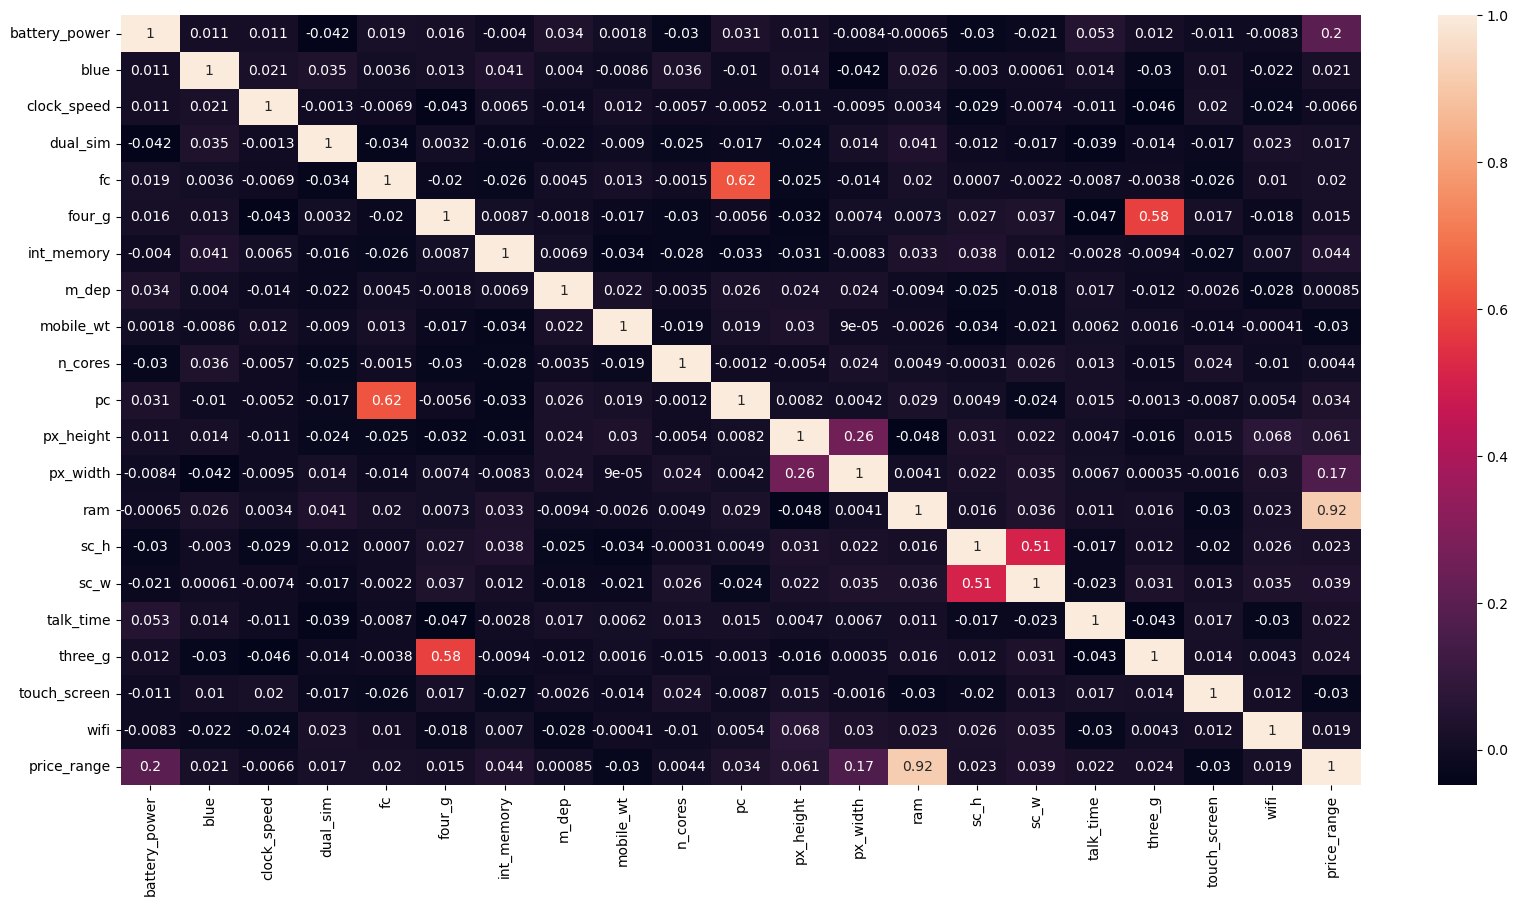

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

**There is maximum point of correlation in the price_range and ram around (0.92 points)**

### Split features & target

In [52]:
y = df["price_range"]
X = df.drop('price_range', axis=1)

### Identify categorical & numeric columns

In [54]:
binary_cols = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]
binary_cols

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [55]:
num_cols = [
    "battery_power", "clock_speed", "int_memory", "m_dep", "mobile_wt",
    "n_cores", "pc", "fc", "px_height", "px_width", "ram",
    "sc_h", "sc_w", "talk_time"
]
num_cols

['battery_power',
 'clock_speed',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'fc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

### Column Transformer

In [57]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("binary", "passthrough", binary_cols)
])

### Fit and transform

In [59]:
X_processed = preprocessor.fit_transform(X)
X_processed = pd.DataFrame(X_processed, columns=num_cols + binary_cols)

# Handle Class Imbalance

In [61]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_processed, y)

print("Actual Classes:", Counter(y))
print("After SMOTE:", Counter(y_sm))

Actual Classes: Counter({1: 500, 2: 500, 3: 500, 0: 500})
After SMOTE: Counter({1: 500, 2: 500, 3: 500, 0: 500})


# Model Creation

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

### logistic Regression

In [65]:
lr = LogisticRegression()

In [66]:
lr.fit(x_train, y_train)

LogisticRegression()

In [67]:
y_predit_lr = lr.predict(x_test)

In [68]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_lr),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_lr))

Test Score

accuracy_score 0.9475 

classification_report
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       105
           1       0.94      0.97      0.95        91
           2       0.89      0.92      0.91        92
           3       0.96      0.93      0.95       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



### SVM

In [70]:
svm = SVC()

In [71]:
svm.fit(x_train, y_train)

SVC()

In [72]:
y_predit_svm = svm.predict(x_test)

In [73]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_svm),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_svm))

Test Score

accuracy_score 0.8925 

classification_report
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.81      0.88      0.84        91
           2       0.83      0.82      0.82        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



## Decision Tree

In [75]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [76]:
y_predit_dt = dt.predict(x_test)

In [77]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_dt),'\n')
print('classification_report\n',classification_report(y_test,y_predit_dt))

Test Score

accuracy_score 0.85 

classification_report
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       105
           1       0.77      0.82      0.80        91
           2       0.74      0.73      0.74        92
           3       0.89      0.91      0.90       112

    accuracy                           0.85       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



## Applying GridSearchCV For Decision Tree

In [79]:
params = {"criterion":("gini","entropy"),
          "splitter":("best", "random"),
          "max_depth":(list(range(1,20))),
          "min_samples_split":[2,3,4],
          "min_samples_leaf":list(range(1,20))}

In [80]:
dt_gr = DecisionTreeClassifier(random_state=10)
dt_grid = GridSearchCV(dt_gr,params,scoring="f1_weighted",n_jobs= -1,verbose=2,cv=3)

In [81]:
dt_grid.fit(x_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='f1_weighted', verbose=2)

In [82]:
best_params = dt_grid.best_params_
print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'})


In [83]:
dt1=DecisionTreeClassifier(**best_params, random_state=42)

In [84]:
dt1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       random_state=42)

In [85]:
y_predit_dt_gr=dt1.predict(x_test)

In [86]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_dt_gr),'\n')
print('classification_report\n',classification_report(y_test,y_predit_dt_gr))

Test Score

accuracy_score 0.8425 

classification_report
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       105
           1       0.78      0.80      0.79        91
           2       0.71      0.84      0.77        92
           3       0.92      0.85      0.88       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.85       400



In [87]:
pd.crosstab(y_test,y_predit_dt_gr)

col_0,0,1,2,3
price_range,,,,
0,92,13,0,0
1,4,73,14,0
2,0,7,77,8
3,0,0,17,95


## Random Forest

In [89]:
rf=RandomForestClassifier(n_estimators=10) 
rf.fit(x_train, y_train)
y_predit_rf = rf.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf),'\n')
print('classification_report\n',classification_report(y_test,y_predit_rf))

Test Score

accuracy_score 0.83 

classification_report
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       105
           1       0.78      0.75      0.76        91
           2       0.73      0.80      0.76        92
           3       0.93      0.83      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



## Hyperparameter Tuning using Random Forest

In [91]:
params = {
          "n_estimators":[5,10,20,40,80,120,200,400,750,1000],
          "criterion":("gini","entropy"),
          "max_depth":(list(range(2,20))),
          "min_samples_split":[2,3,4,5,6,7,8,9],
          "min_samples_leaf":[2,3,4,5,6,7,8,9],
          "max_features":["sqrt","log2"],
          "bootstrap":[True,False]
}

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
rf1= RandomForestClassifier(random_state=1,n_jobs=-1)
randomcv=RandomizedSearchCV(estimator=rf1,param_distributions=params,
                          cv=3, refit=True,verbose=2,scoring="f1_weighted",
                           n_iter=200,random_state=10,n_jobs=-1)

In [94]:
randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ('gini', 'entropy'),
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [5, 10, 20, 40, 80, 120,
                                                         200, 400, 750, 1000]},
                   random_state=10, scoring='f1_weighted', verbose=2)

In [95]:
best_params = randomcv.best_params_
print("Best parameters:", best_params)

Best parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 13, 'criterion': 'entropy', 'bootstrap': False}


In [96]:
rf_hyp = RandomForestClassifier(**best_params, random_state=42)

In [97]:
rf_hyp.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=13,
                       min_samples_leaf=2, n_estimators=1000, random_state=42)

In [98]:
y_predit_rf_hyp = rf_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf_hyp))

Test Score

accuracy_score 0.8975 

classification_report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.85      0.86        91
           2       0.83      0.84      0.83        92
           3       0.94      0.93      0.93       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



## Gradient Boosting

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_predit_gb=gb.predict(x_test)

In [101]:
print(classification_report(y_test,y_predit_gb))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.88      0.90      0.89        91
           2       0.82      0.86      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [102]:
pd.crosstab(y_test,y_predit_gb)

col_0,0,1,2,3
price_range,,,,
0,99,6,0,0
1,4,82,5,0
2,0,5,79,8
3,0,0,12,100


## XGBoost

In [104]:
xgb = XGBClassifier()

In [105]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [106]:
y_predit_xgb = xgb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.905 

classification_report
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.86      0.91      0.88        91
           2       0.87      0.85      0.86        92
           3       0.94      0.92      0.93       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



## Hyperparameter Tuning XGBoost

In [108]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [109]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

In [110]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [111]:
best_params = random_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.9}


In [112]:
xgb_hyp = XGBClassifier(**best_params, random_state=42)

In [113]:
xgb_hyp.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [114]:
y_predit_xgb_hyp = xgb_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.92 

classification_report
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.86      0.91      0.88        91
           2       0.87      0.85      0.86        92
           3       0.94      0.92      0.93       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



# Conclusions

In [116]:
models=['LogisticRegression','SVM','Decision Tree','Random Forest','Gradient Boosting','xgboost']
accuracy_scores=[ accuracy_score(y_test,y_predit_lr),accuracy_score(y_test,y_predit_svm),accuracy_score(y_test,y_predit_dt_gr),accuracy_score(y_test,y_predit_rf_hyp),accuracy_score(y_test,y_predit_gb),accuracy_score(y_test,y_predit_xgb_hyp)]

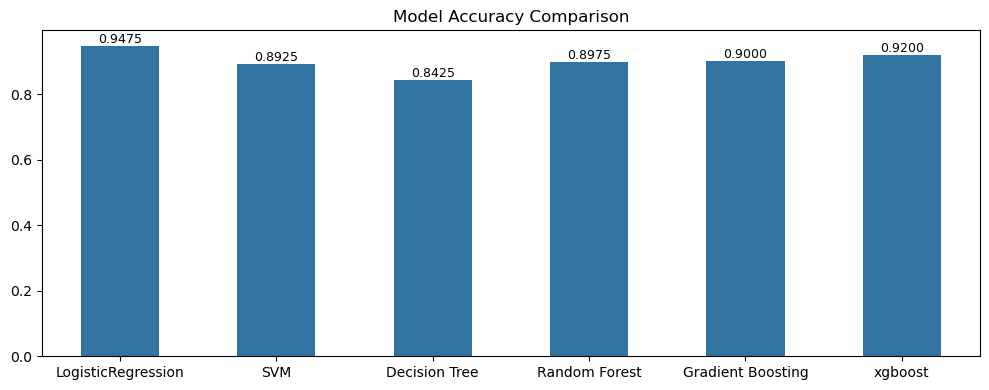

In [202]:
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=models, y=accuracy_scores,width=0.5)
plt.title('Model Accuracy Comparison')
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Model Comparison Report

* **Logistic Regression**: This model performed with **94.75% accuracy**, making it the top performer among all tested models. Its strong result indicates that the relationships between features and the target variable are likely linear and well captured by this algorithm.

* **Support Vector Machine (SVM)**: With **89.25% accuracy**, the SVM model demonstrates solid predictive capability, though it falls slightly short of Logistic Regression. With kernel tuning and parameter optimization, it could potentially achieve better performance.

* **Decision Tree**: This model achieved **84.25% accuracy**, the lowest among all models. While it captures non linear relationships, it may have overfitted the training data, reducing generalization on unseen samples.

* **Random Forest, Gradient Boosting, and XGBoost**: These ensemble models performed strongly, achieving accuracies of **89.75%**, **90.00%**, and **92.00%**, respectively. Their results confirm the effectiveness of ensemble methods in capturing complex feature interactions. However, as with all high-performing models, care should be taken to monitor for possible overfitting and to validate results on independent test data.

## Report on Challenges faced

### 1. Handling Feature Scaling and Variance

##### Problem:

The dataset contained numerical features with widely varying ranges. **For example, ram and battery_power had values in the thousands, while others like clock_speed or m_dep were much smaller**. This caused inconsistent model convergence and biased learning toward high-magnitude features.

##### Solution:

Applied **StandardScaler()** from Scikit-Learn to normalize the numerical columns **(battery_power, ram, px_height, etc.)** while keeping binary features unchanged.

##### Why?

Ensures all features contribute equally to model training and improves the stability and accuracy of algorithms like Logistic Regression, SVM, and Gradient Boosting.


### 2. Outliers and Skewed Distributions

##### Problem:

Some features, particularly **px_height, fc, and ram**, contained outliers that could distort scaling and model coefficients.

##### Solution:

Used the **Interquartile Range (IQR)** method to detect and cap extreme outliers.
Calculated Q1 (25th percentile) and Q3 (75th percentile) for each numerical column, computed IQR as **Q3 - Q1**, and replaced any value outside **1.5 * IQR** limits with the median.

##### Why?

This prevents extreme values from disproportionately influencing model parameters and ensures smoother learning during model fitting.


### 3. Class Imbalance in Target Variable

##### Problem:

Certain price range categories were underrepresented, leading to bias toward majority classes during training.

##### Solution:

Applied **SMOTE (Synthetic Minority Over-sampling Technique)** to balance the dataset by generating synthetic samples for minority classes.

##### Why?

Ensures fair model training across all classes, improves prediction consistency, and reduces the risk of bias toward dominant categories.


### 4. Model Overfitting in Ensemble Methods

##### Problem:

Complex models like Random Forest, Gradient Boosting, and XGBoost achieved very high training accuracy but slightly lower validation accuracy — indicating mild overfitting.

##### Solution:

Used **cross-validation** and **hyperparameter tuning** (e.g., limiting tree depth, adjusting learning rate, and controlling number of estimators).

##### Why?

Improves generalization performance and ensures the models perform reliably on unseen data.

# Analysis Report

### Goal  

Bob aims to price and sell phones in the **high-end mobile phone market (Price Range 3)**.  
The objective is to analyze the dataset to identify the **key features influencing popularity and purchase decisions** in this premium category.  
By understanding these factors, Bob can **strategically set competitive prices** while positioning his phones effectively in the market.  

### Key Features of Very High-Cost Phones (Price Range 3):

* **RAM** : Phones in the high-price category have more RAM. This makes them faster and better for gaming and multitasking.
* **Display Quality**: Higher-end phones have better screens with higher resolution, making them clearer and sharper.
* **Battery Life**: Premium phones often have longer-lasting batteries, which is important to customers who want to use their phones for a full day.
* **Cameras**: High-cost phones have better front and back cameras, with more megapixels for better photo quality.
* **Storage**: These phones usually have more storage, which is useful for people who need space for apps, photos, and videos.
* **Performance (Cores)**: High-end phones have more powerful processors (more cores), making them faster and better at handling heavy tasks.

### How This Helps Bob’s Company:

* **Setting Prices**:
Bob can set the price of his phones based on the high-end features that people want, like large RAM, good cameras, and high-quality displays.
To compete, Bob should ensure his phones have these features and price them in a way that attracts people looking for a premium phone but at a reasonable price.

* **Staying Competitive**:
Bob can offer similar or even better features than expensive brands at a slightly lower price, attracting customers who want premium quality without paying too much.

* **Targeting the Right Customers**:
Bob should target customers who want the best performance, camera quality, and battery life. These features are important to people willing to pay for a high-end phone.

* **Competitive Pricing Strategy**:
By comparing the prices of top competitors and offering similar features, Bob can price his phones in the very high-cost category but still stand out by offering good value for money.

## Conclusion  

Bob can set competitive prices for his phones by focusing on the features that are most important to customers buying high-end phones, like more RAM, better cameras, and longer battery life. By pricing his phones competitively and offering the features people want, Bob’s company can succeed in the very high-cost mobile phone market.

## Deployment

In [206]:
#model
pickle.dump(lr, open('model.pkl', 'wb'))

In [208]:
#preprocessor
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))